### About the dataset

This dataset contains information about diamond prices (2008, in dollars) as well as various characteristics of diamonds that some of them affect the price: carat (weight), cut, color, clarity, and some physical measurements (depth, table, x, y, z). The figure below illustrates what these measurements represent:

![DIMENSIONS](resources/diamond-dimensions.png)

Carat is a unit of mass equal to 200 milligrams and is used to measure gemstones and pearls. Cut grade is an objective measure of the diamond's light performance or what is commonly known as its brilliance.<br> The figure below shows the color grading of diamonds:

![GRADING](resources/color-grading.jpg)

Finally, the figure below illustrates the clarity grading of diamonds:

![CLARITY](resources/clarity-grading.png)

In the next section we will explore and visualize the distributions of the variables in this dataset individual.

### Importing libraries and dataset

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [29]:
diamonds = pd.read_csv('data/diamonds.csv')

In [30]:
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 100
palette = sns.color_palette(palette='winter').as_hex()
palette1 = sns.color_palette(palette='crest').as_hex()

### 1. Descriptive Statistics

First, we get the first ten data points, then determine the dimensions of the dataset. For each variable, we calculate various statistical measures (mean, median, mode, range, etc., for numerical variables, and count of unique data, most repeated data, frequency of repetition, etc., for qualitative variables) and report them.

In [31]:
diamonds.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336
6,7,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,336
7,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,337
8,9,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,337
9,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39,338


In [32]:
print("Dimension:",diamonds.shape)

Dimension: (53940, 11)


In [33]:
desc = diamonds.describe()
desc.loc['mode'] = diamonds.mode(numeric_only=True).iloc[0,:]
desc.loc['range'] = desc.loc['max'] - desc.loc['min']
desc.loc['iqr'] = desc.loc['75%'] - desc.loc['25%']
desc.iloc[:,1:]

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000
mode,0.300000,62.000000,56.000000,4.370000,4.340000,2.700000,605.000000
range,4.810000,36.000000,52.000000,10.740000,58.900000,31.800000,18497.000000


In [34]:
diamonds.describe(include=['O'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


### 2. Correlation Heatmap

We drop the first column, then we plot a heatmap to visualize the relationship between numerical variables.

In [35]:
diamonds = diamonds.drop(columns=[diamonds.columns[0]])

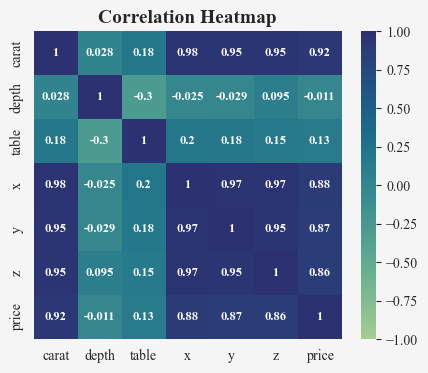

In [36]:
plt.figure(figsize=(5,4), facecolor='whitesmoke')
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
diamonds_corr = diamonds.iloc[:,[0,4,5,6,7,8,9]].corr()
sns.heatmap(diamonds_corr,vmin=-1,vmax=1,cmap='crest',square=True,annot=True,
            annot_kws={'fontsize':9, 'fontweight':'bold'});

### 3. Analyzing Shape with Histogram/QQ-plot

We plot a histogram and a QQ-plot for the diamond price, and based on that, we analyze the distribution shape of this variable.

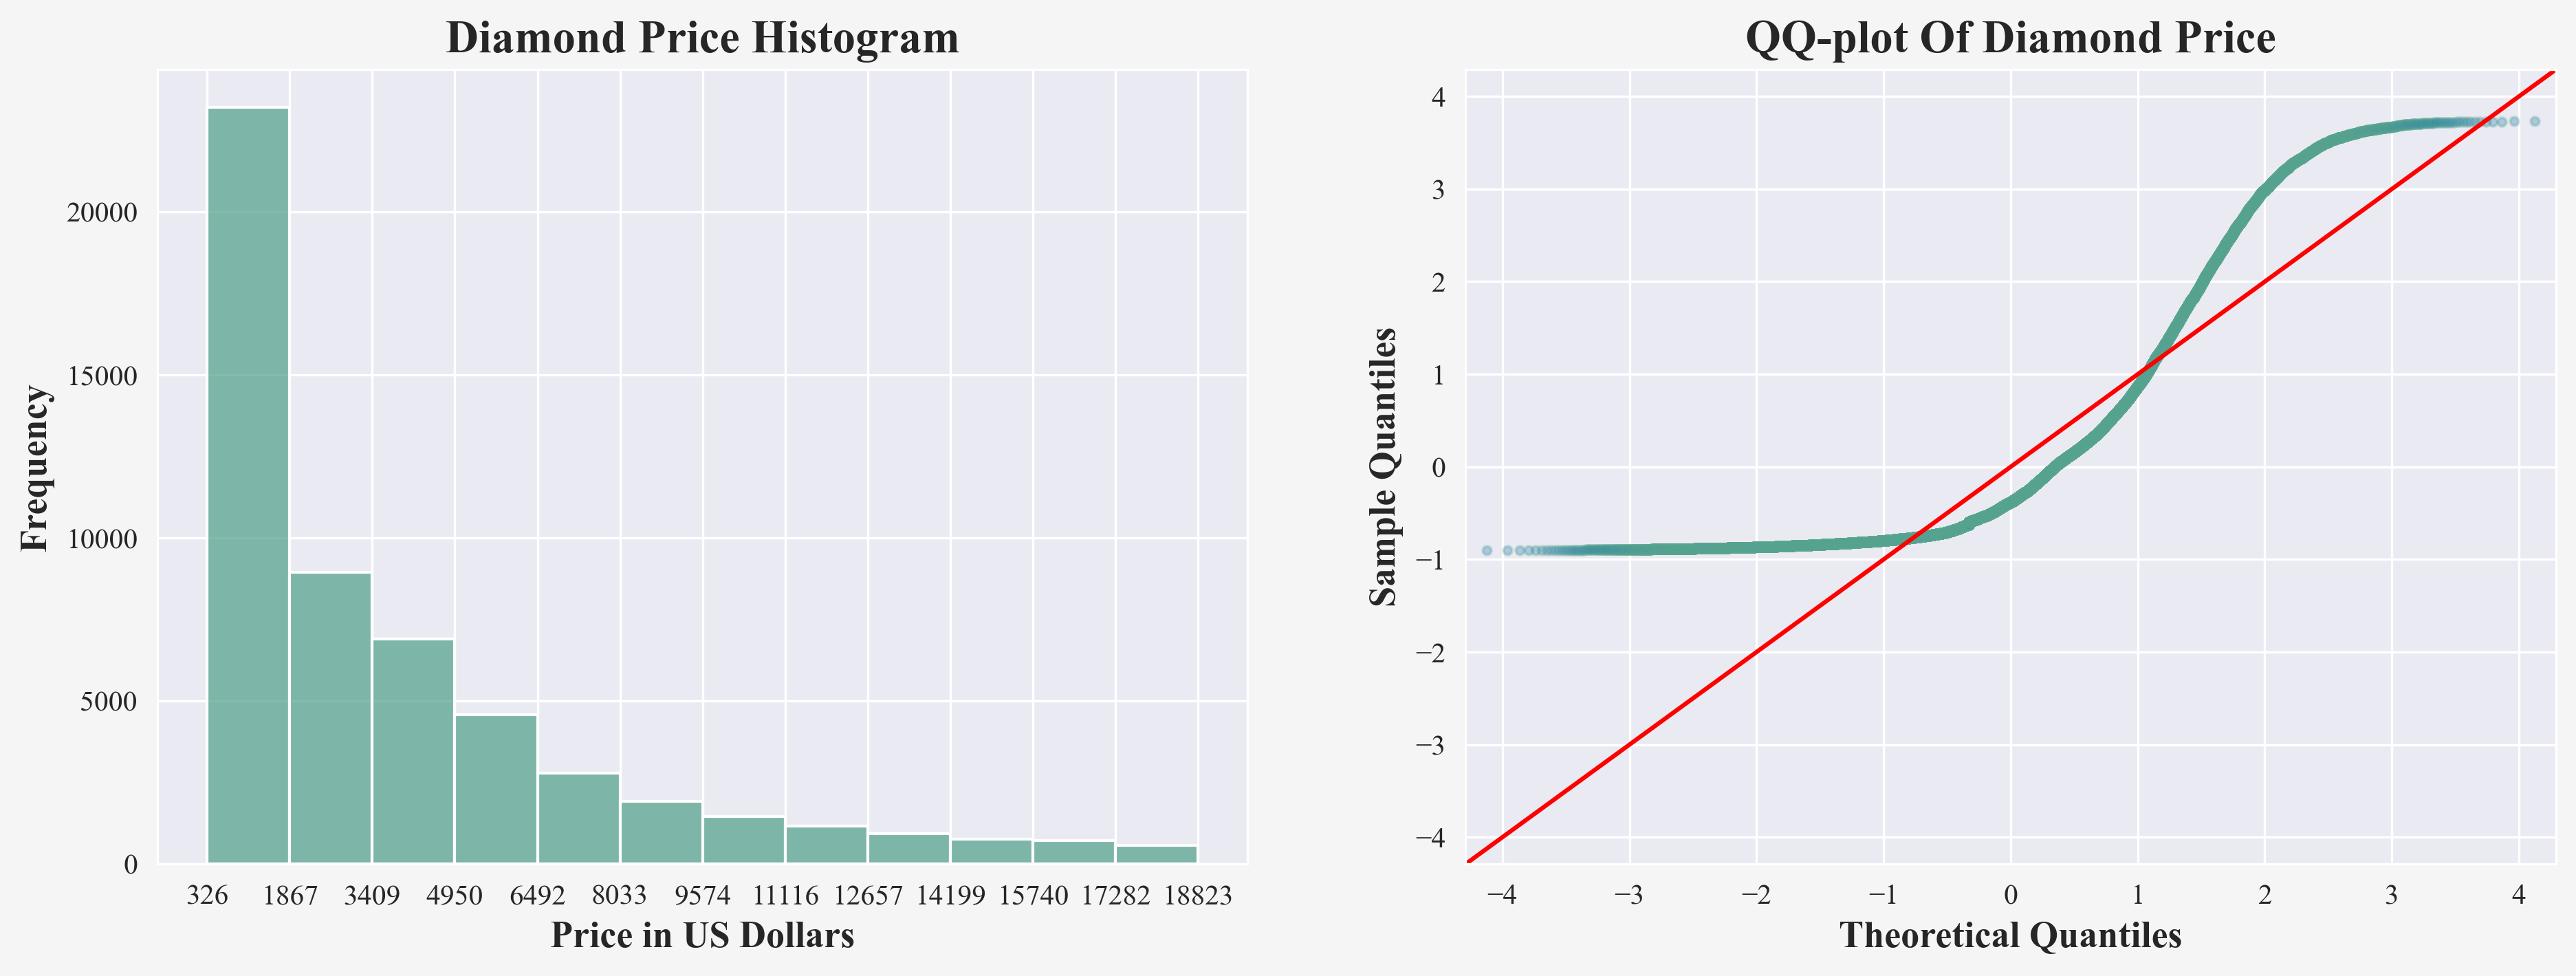

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), facecolor='whitesmoke', dpi=300)
ax[0].set_title('Diamond Price Histogram', fontsize=16, fontweight='bold')
sns.histplot(ax=ax[0], data=diamonds, x='price', bins=12, color=palette1[1])
ax[0].set_xlabel("Price in US Dollars", fontweight='bold',fontsize=13)
ax[0].set_ylabel("Frequency", fontweight='bold',fontsize=13)
ax[0].set_xticks(np.linspace(np.min(diamonds['price']),np.max(diamonds['price']),13))
prob = sm.ProbPlot(diamonds['price'], fit=True)
prob.qqplot(marker='.', markeredgecolor=palette1[1], alpha=.3, ax=ax[1], line='45')
ax[1].set_title("QQ-plot Of Diamond Price",fontweight='bold',fontsize=16)
ax[1].set_ylabel('Sample Quantiles',fontweight='bold',fontsize=13)
ax[1].set_xlabel('Theoretical Quantiles',fontweight='bold',fontsize=13);

### 4. Boxplots for Categorical Variables

We plot a boxplot for qualitative data compared to the price variable, and we mark outliers in it with an 'x' symbol.

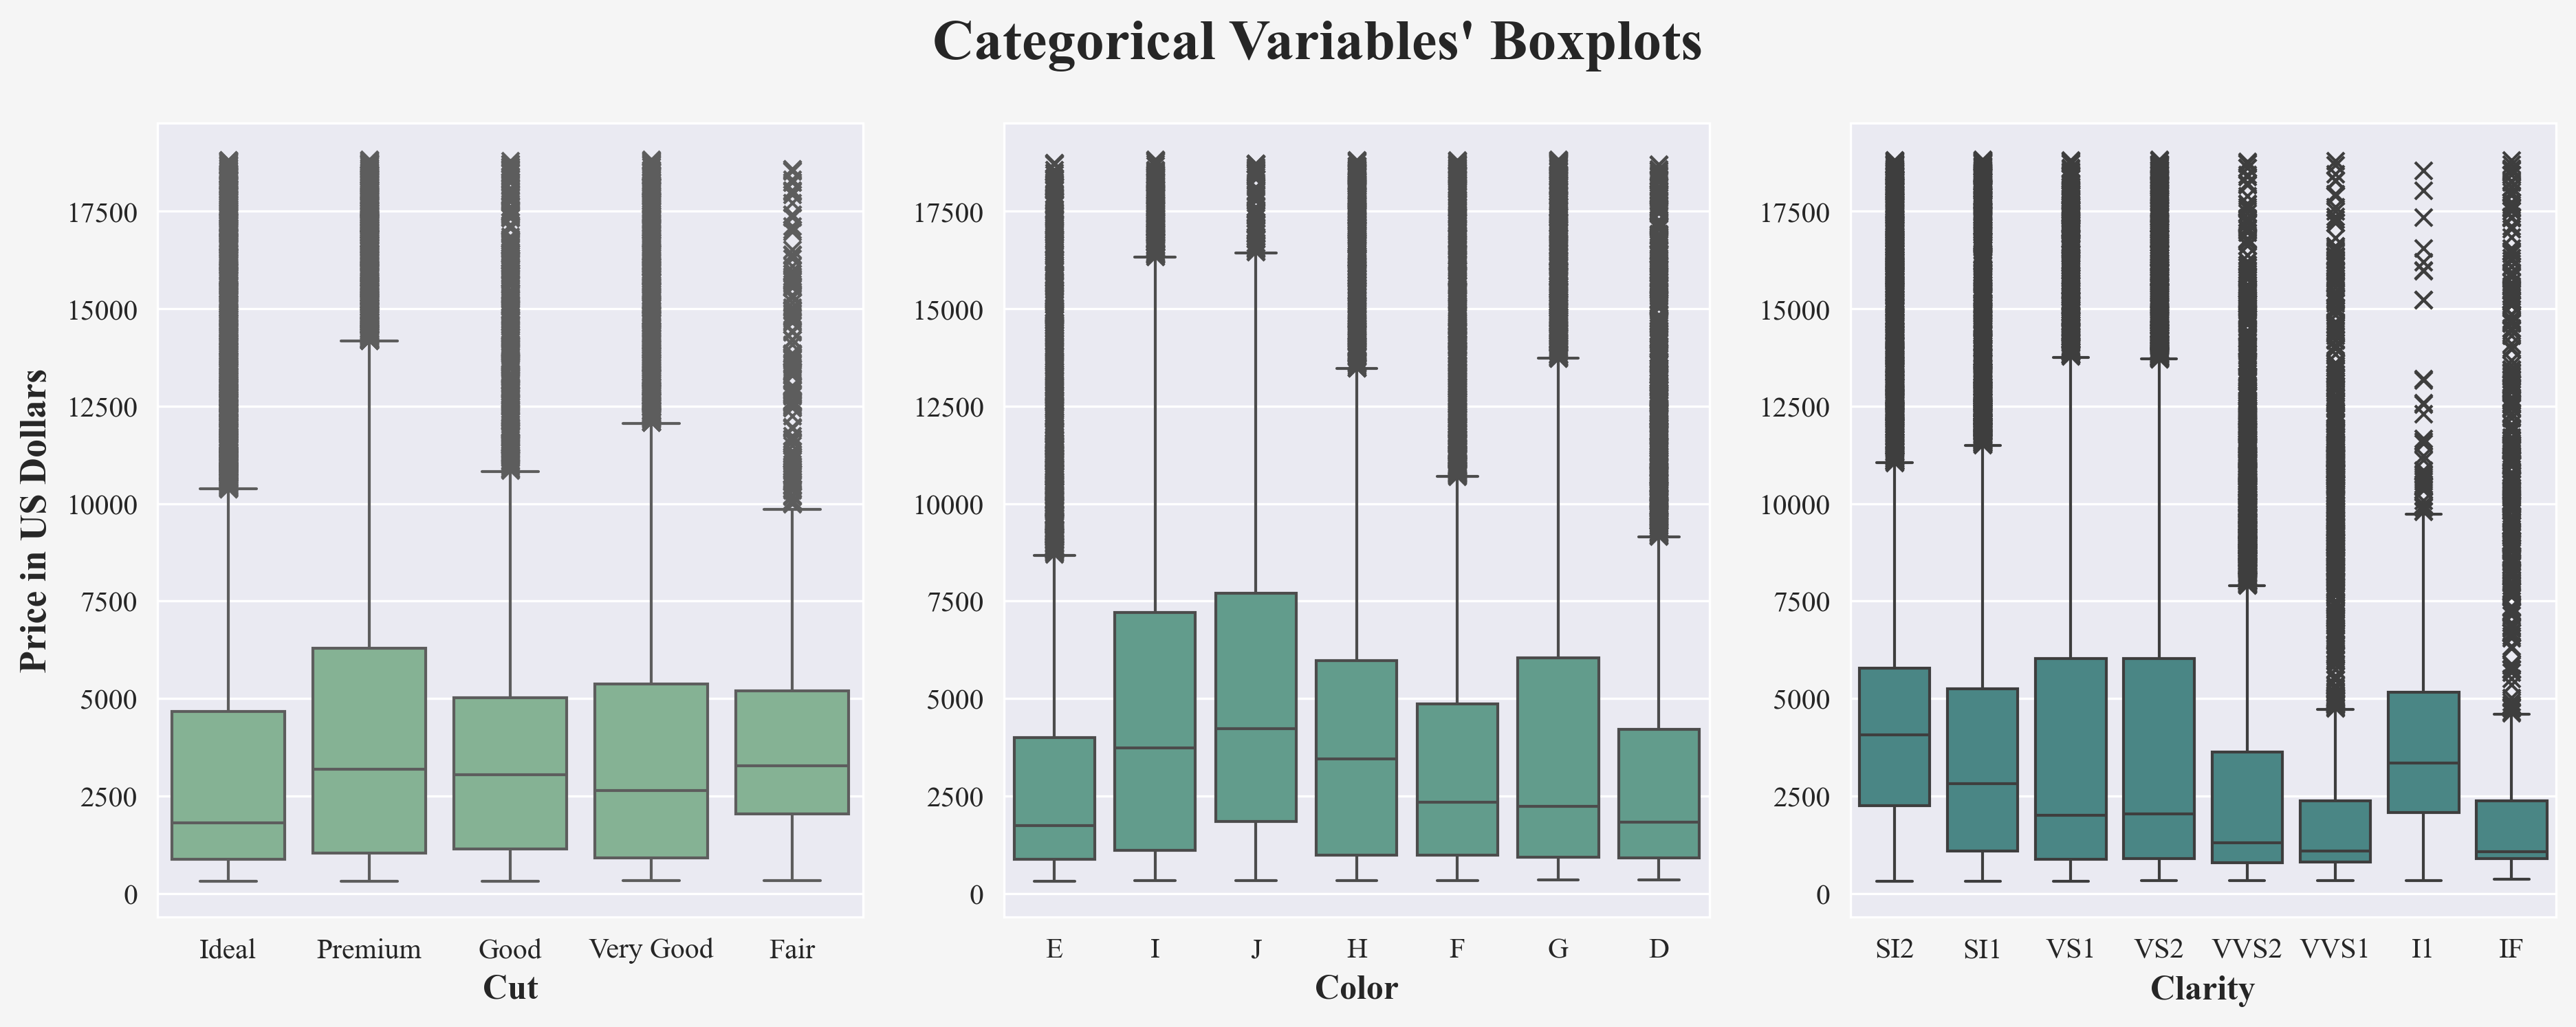

In [38]:
non_numerics = diamonds.columns[~diamonds.columns.isin(diamonds.select_dtypes(np.number).columns)]
plt.figure(figsize=(15,5),facecolor='whitesmoke',dpi=300)
plt.suptitle("Categorical Variables' Boxplots",fontweight='bold',fontsize=20)
for i,col_name in enumerate(non_numerics):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=diamonds,x=col_name, y='price',color=palette1[i],flierprops={'marker': 'x'});
    if i == 0:
        plt.ylabel("Price in US Dollars",fontweight='bold',fontsize=13)
    else:
        plt.ylabel("")
    plt.xlabel(col_name.title(),fontweight='bold',fontsize=12)

### 5. Pairwise Relationships

here, we're using a pairplot to investigate the relationship between different numerical variables.

<Figure size 1920x1440 with 0 Axes>

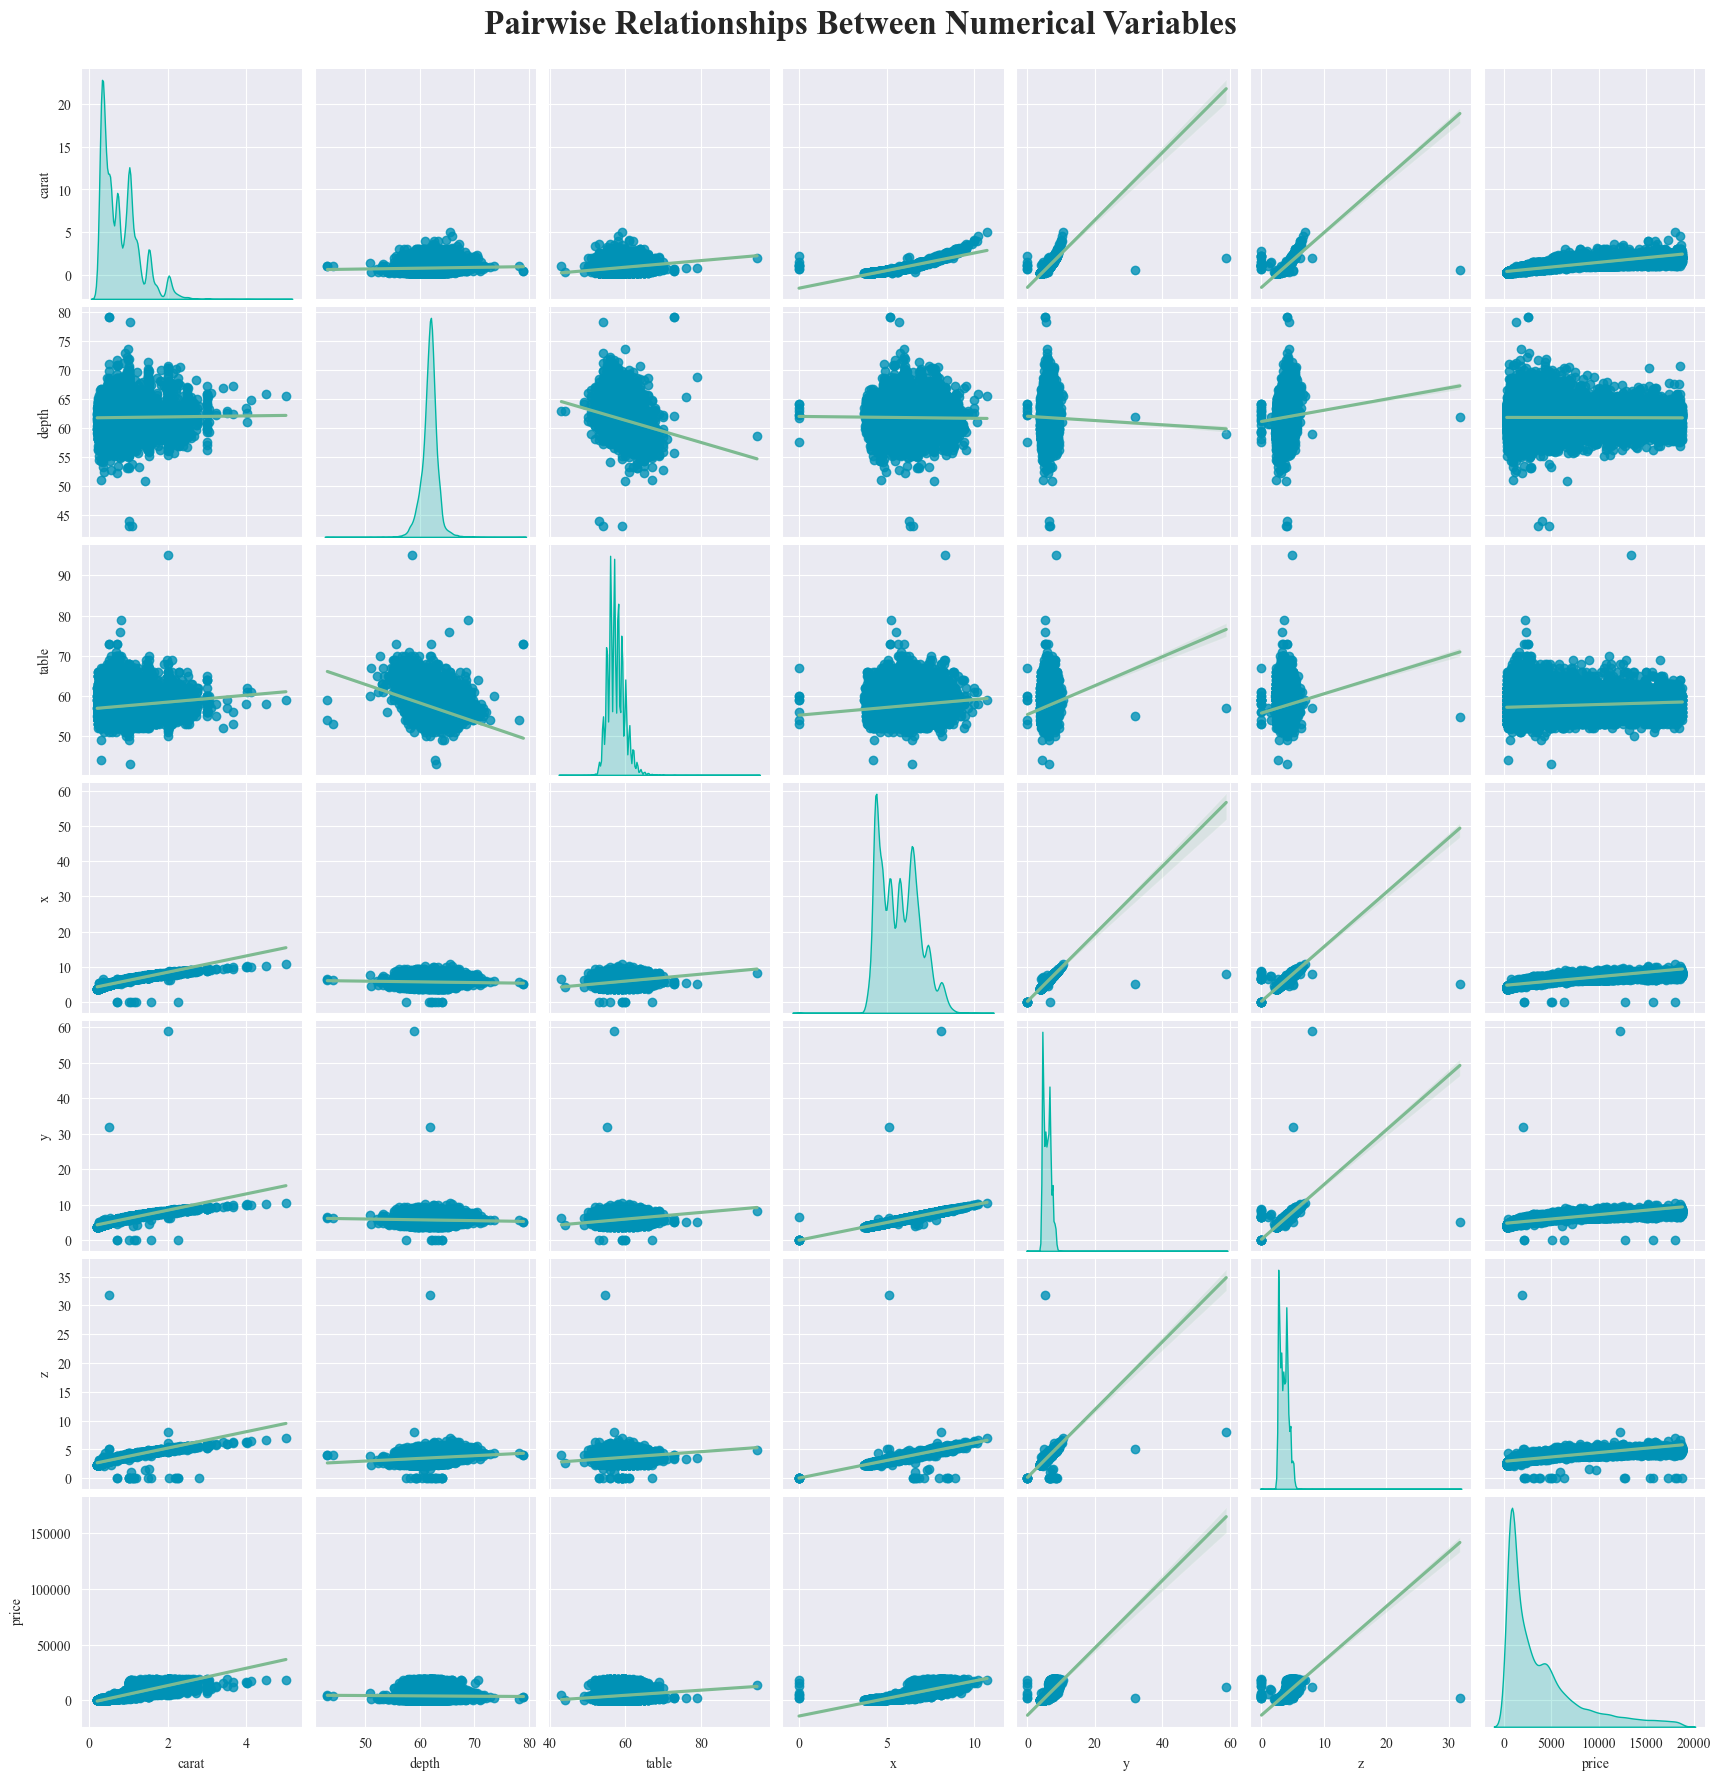

In [39]:
cols_to_plot = ['carat','depth','table','price']
plt.figure(facecolor='whitesmoke',dpi=300)
pplot = sns.pairplot(diamonds,
             kind='reg',
             diag_kind='kde',
             diag_kws={'color':palette[4]},
             plot_kws={'color':palette[3],'line_kws':{'color':palette1[0]}})
pplot.fig.suptitle("Pairwise Relationships Between Numerical Variables", y=1.02, fontweight='bold', fontsize=24);

### 6. Pie Chart/Violin Plot

We use a pie chart to show the percentage of each cut type in the dataset and use a violin plot to investigate the relationship between this variable and diamond price. Also, to display the percentage, we first define a function.

In [21]:
def show_pct(keys,df):
    for i,key in enumerate(keys):
        pct = df.loc[df['cut']==key,'cut'].count()/df['cut'].count()
        keys[i] = f"{key} ({np.round(pct,decimals=2)*100}%)"

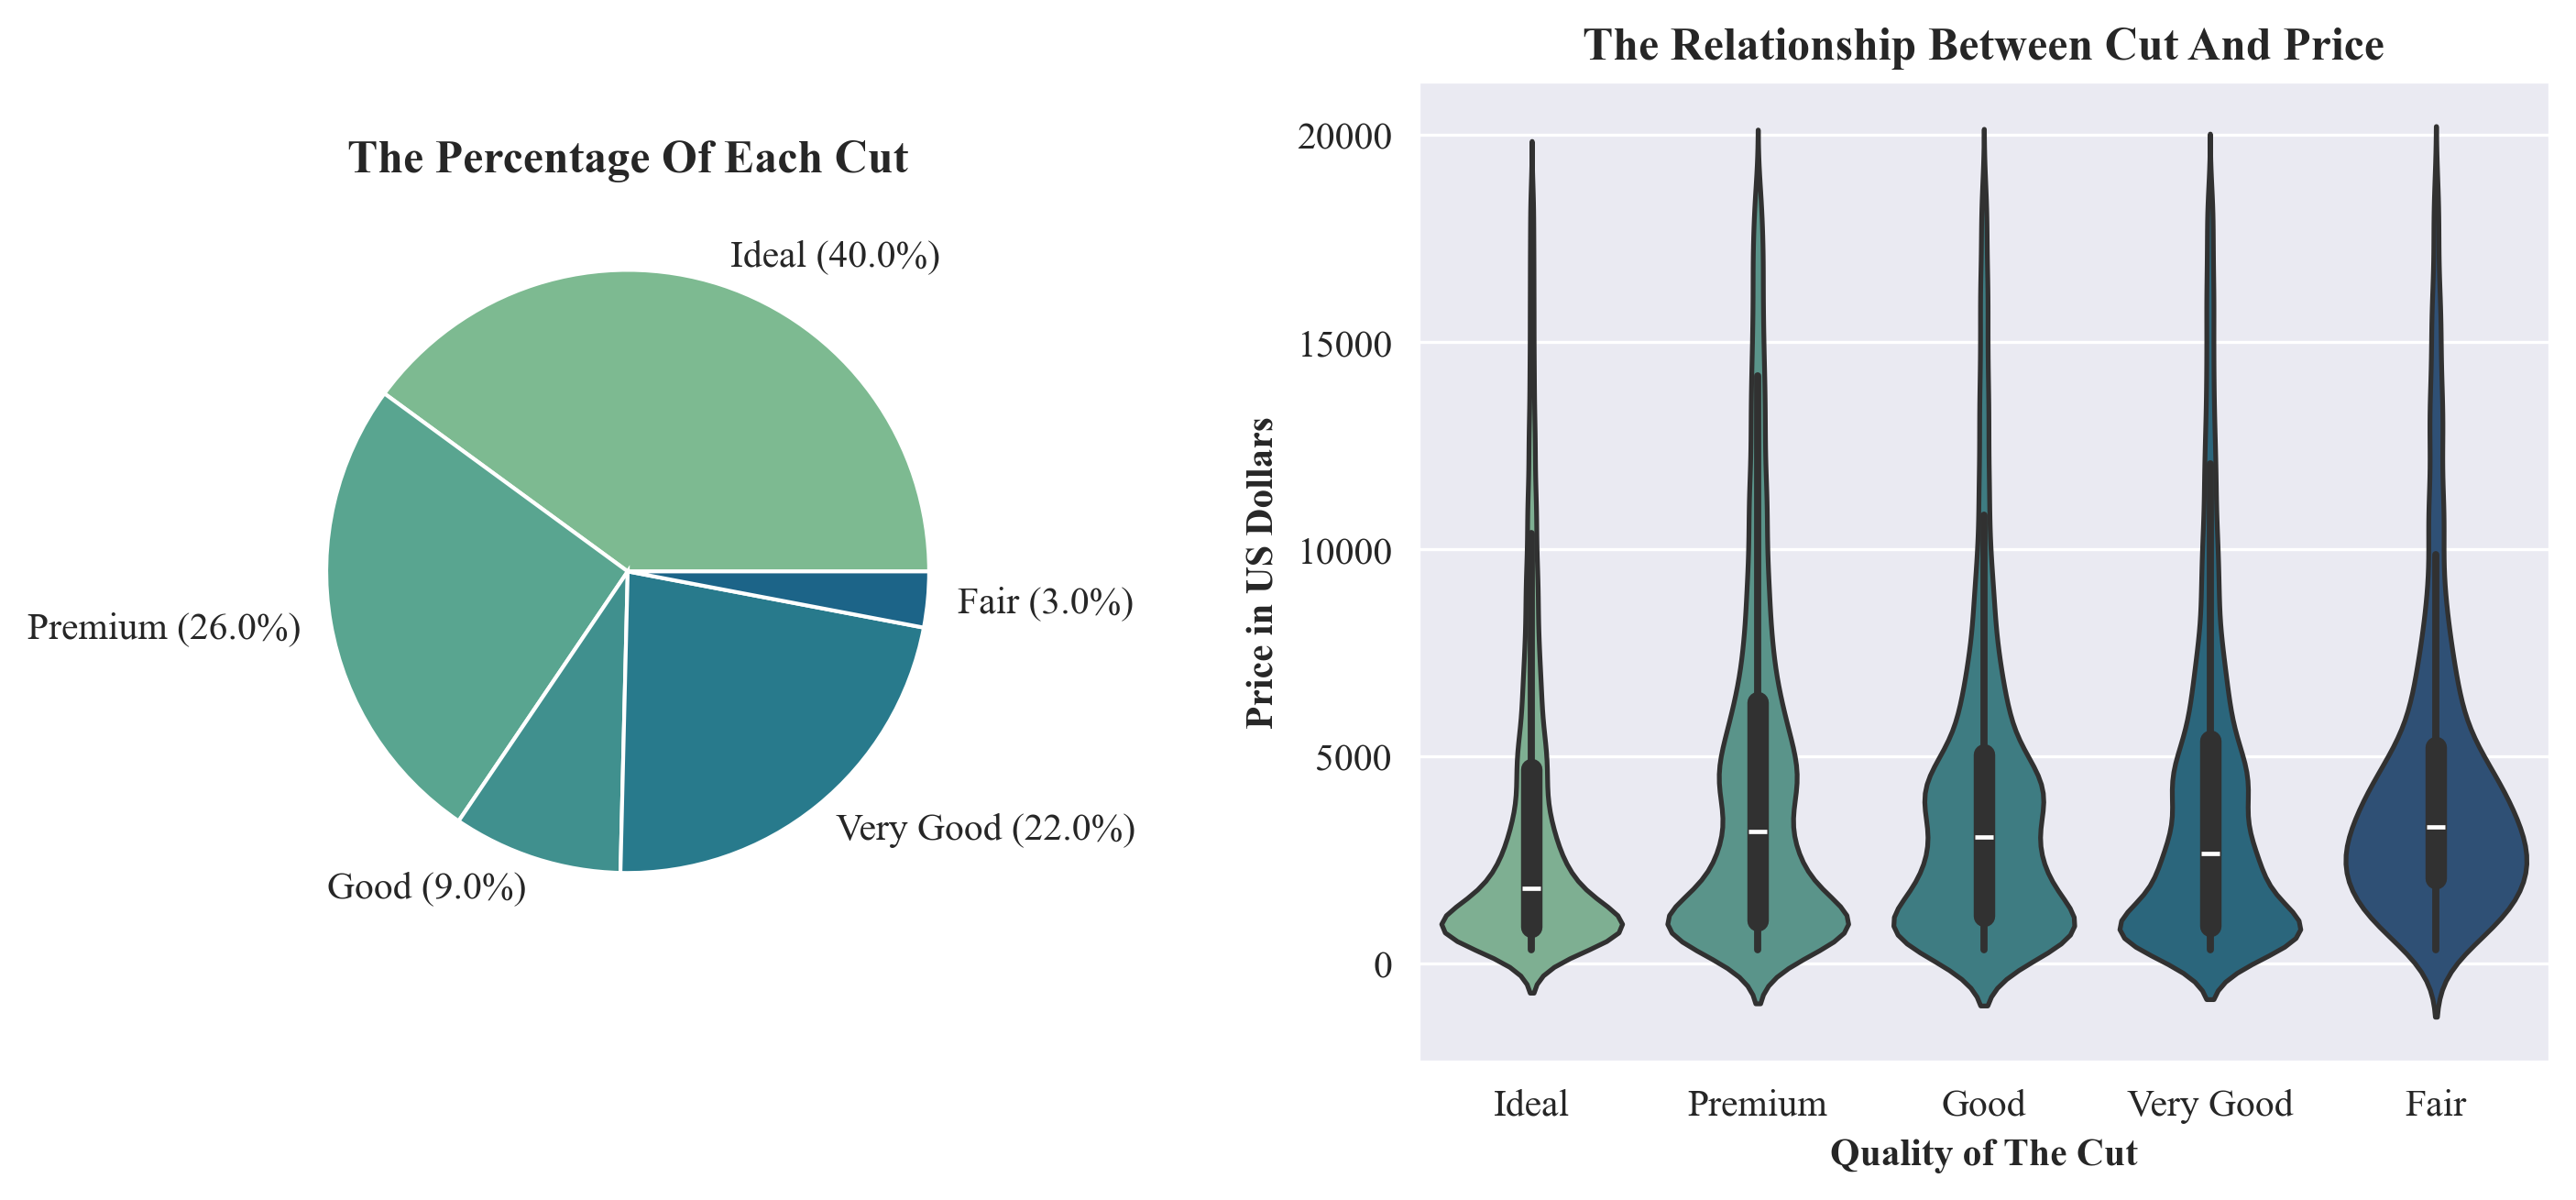

In [22]:
fig,ax = plt.subplots(1,2,figsize=(10,5),width_ratios=[2,3],dpi=300)
#fig.suptitle("Cut Type Analysis")
ax[0].set_title("the percentage of each cut".title(),fontdict={'fontweight':'bold'})
pie_keys = diamonds['cut'].unique().tolist()
pie_counts = [diamonds.loc[diamonds['cut']==cut,'cut'].count() for cut in pie_keys]
show_pct(pie_keys,diamonds)
ax[0].pie(pie_counts,labels=pie_keys,colors=palette1);
ax[1].set_title("the relationship between cut and price".title(),fontdict={'fontweight':'bold'})
sns.violinplot(ax=ax[1],data=diamonds,x='cut',y='price',hue='cut',palette='crest');
ax[1].set_xlabel("Quality of The Cut",fontweight='bold')
ax[1].set_ylabel("Price in US Dollars",fontweight='bold')
fig.tight_layout(pad=3)

### 7. Weight vs. Price Scatterplot

Using a scatter plot, we summarize the relationship between price and carat based on the clarity.

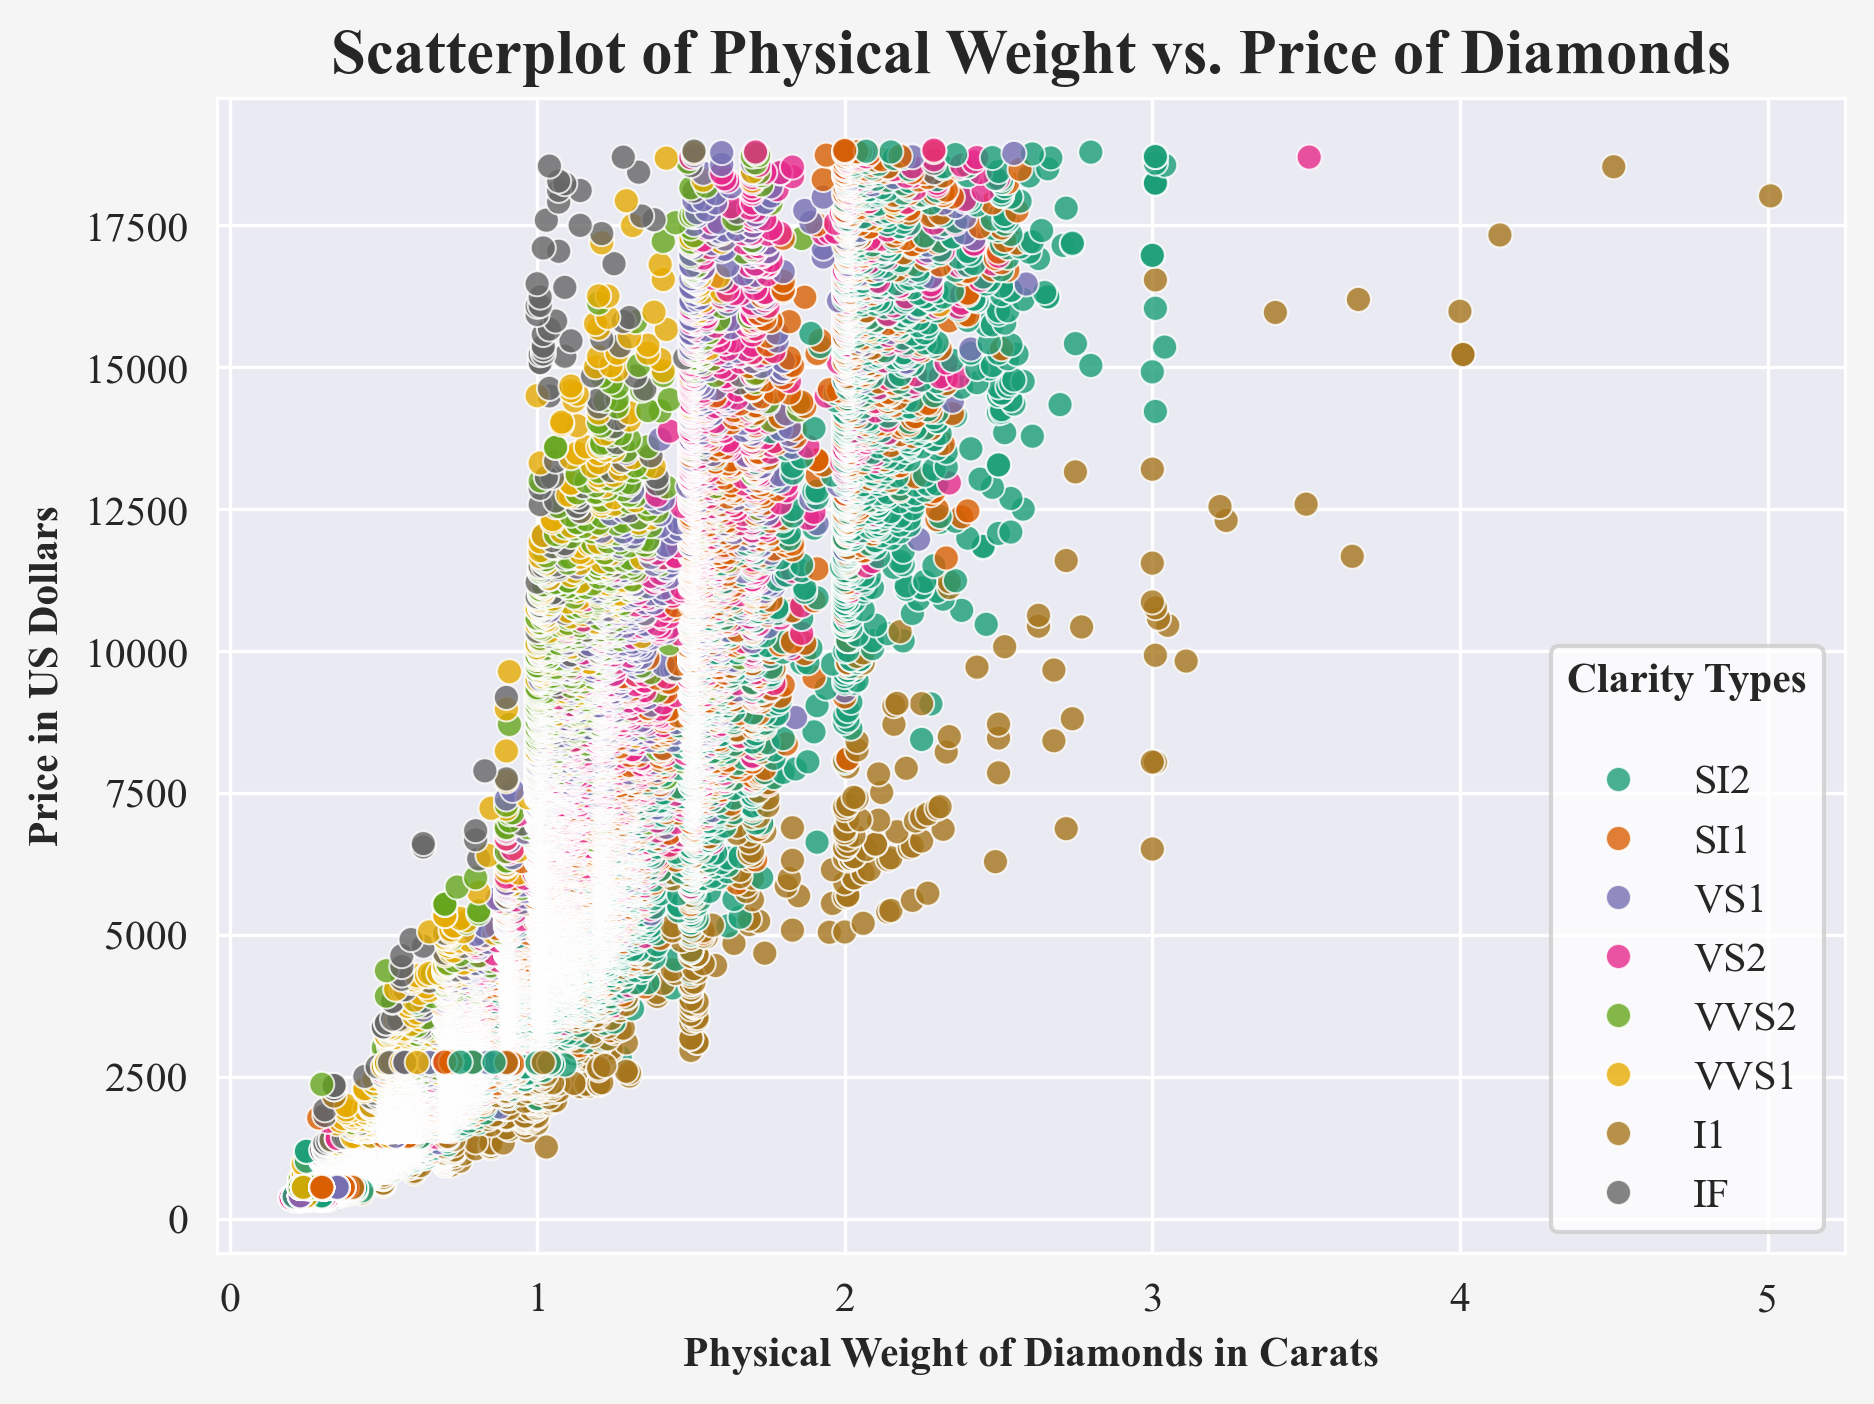

In [23]:
plt.figure(figsize=(7,5),facecolor='whitesmoke',dpi=300)
plt.title("Scatterplot of Physical Weight vs. Price of Diamonds",fontweight='bold',fontsize=15)
gfg = sns.scatterplot(data=diamonds,x='carat',y='price',hue='clarity',alpha=.8,palette='Dark2')
plt.ylabel("Price in US Dollars",fontweight='bold')
plt.xlabel("Physical Weight of Diamonds in Carats",fontweight='bold')
plt.legend(title="Clarity Types\n",loc='lower right').get_frame().set_facecolor('white')
plt.setp(gfg.get_legend().get_title(), fontsize='10', fontweight='bold');

### Bonus: Dynamically Highlighting The Highest Value

We calculate the average depth based on the cut type and display it on a bar chart. Then, we highlight the bar with the highest depth.

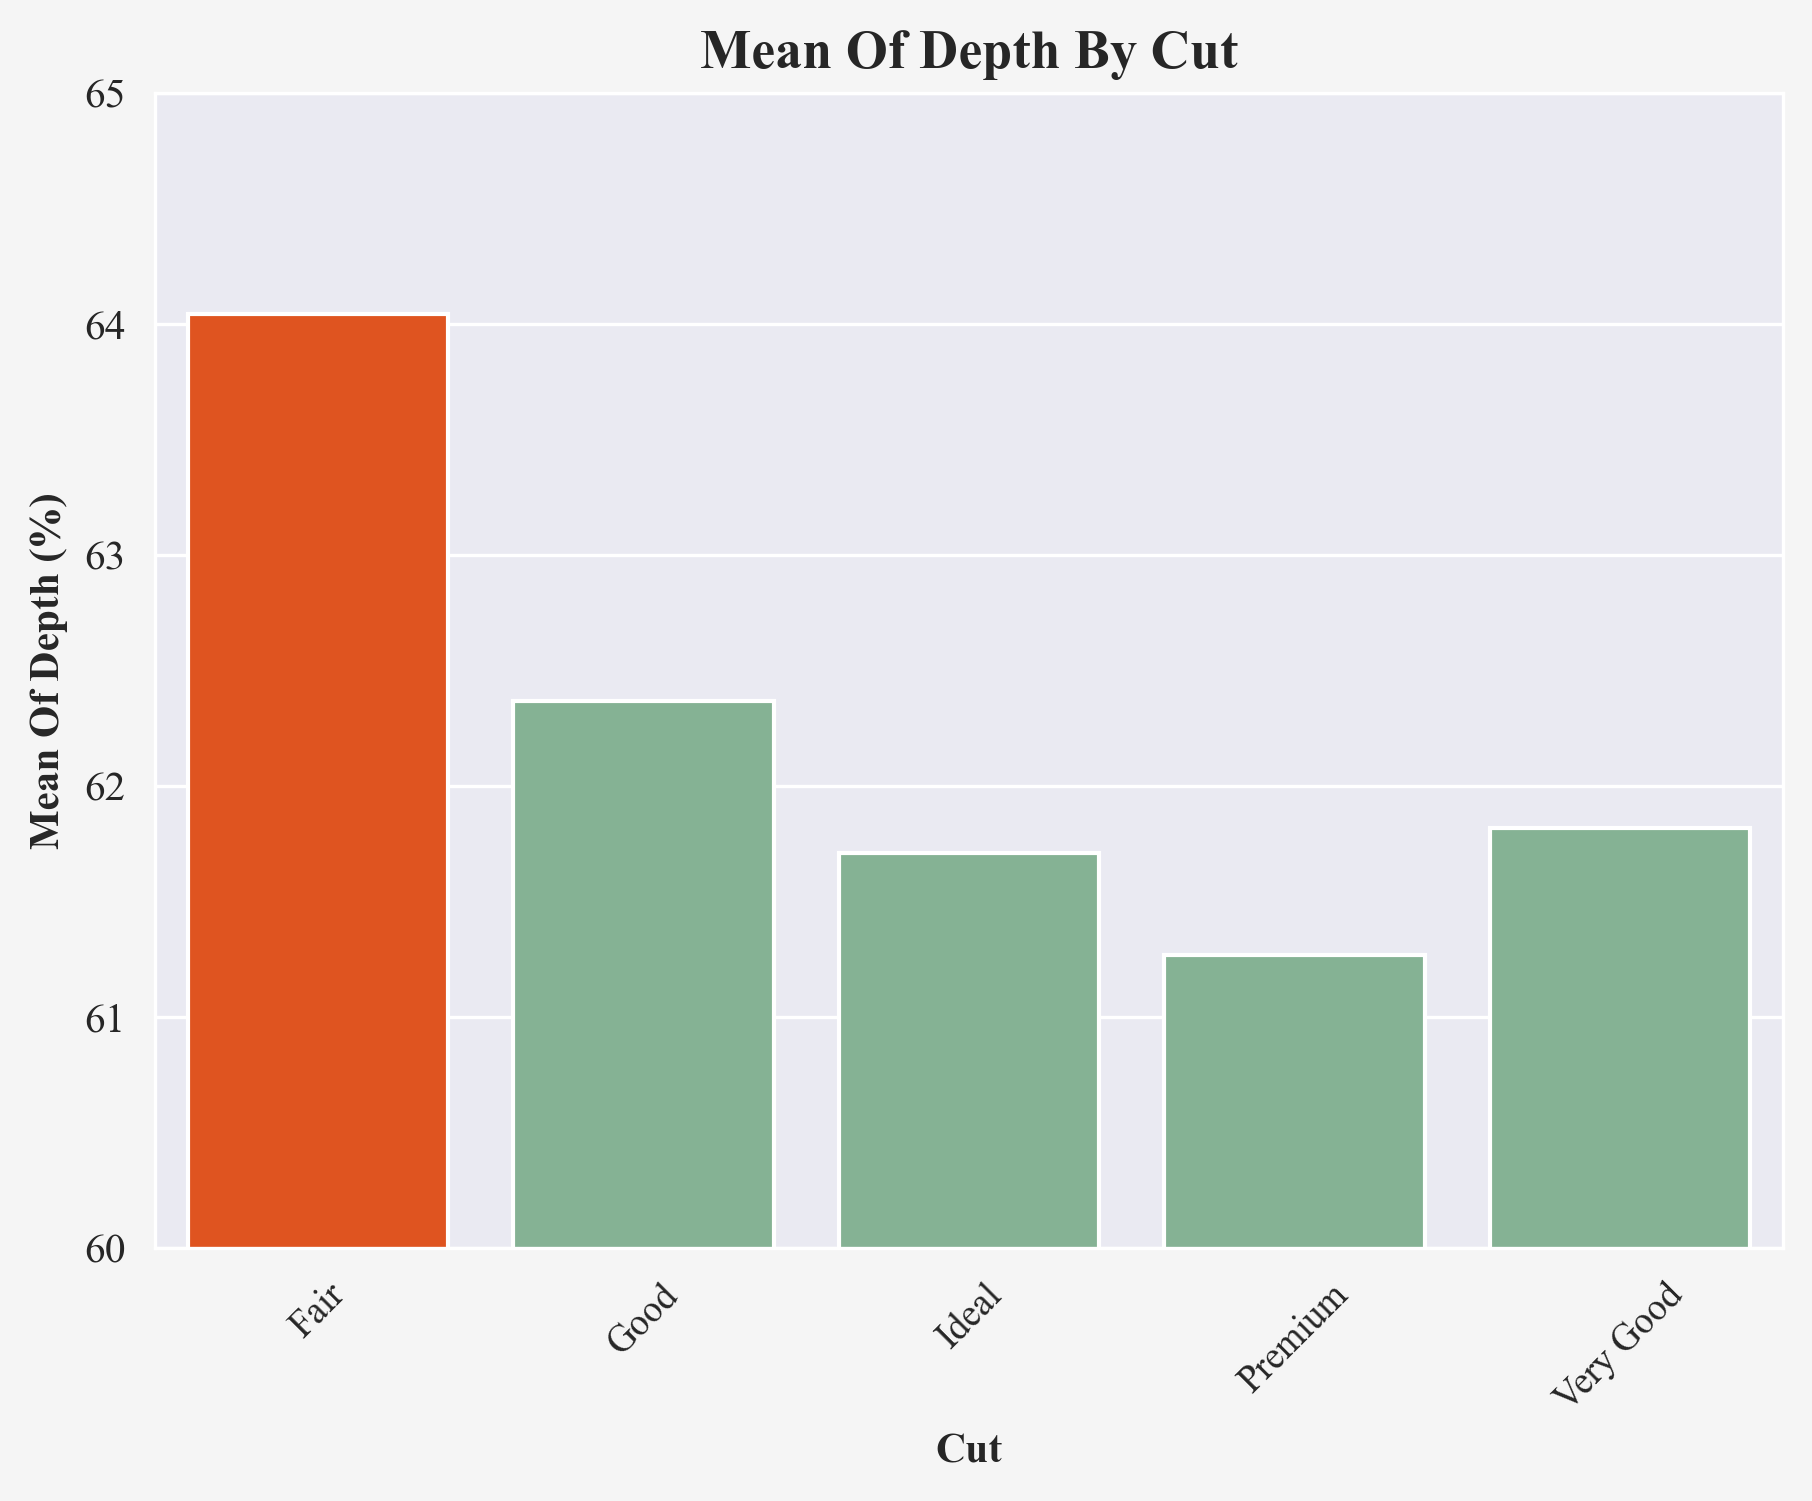

In [24]:
plt.figure(figsize=(7,5),facecolor='whitesmoke',dpi=300)
label_lst = diamonds.groupby(['cut'], as_index=False)['depth'].mean()['cut'].to_list()
mean_lst = diamonds.groupby(['cut'])['depth'].mean().to_list()
colors_lst = ['orangered' if m==np.max(mean_lst) else palette1[0] for m in mean_lst]
plt.title("Mean Of Depth By Cut",fontweight='bold',fontsize=13)
sns.barplot(data=diamonds,x='cut',y='depth',hue='cut',hue_order=label_lst,
            errorbar=None,order=label_lst,palette=colors_lst)
plt.xlabel("Cut",fontweight='bold')
plt.ylabel('Mean Of Depth (%)',fontweight='bold')
plt.xticks(rotation=45,fontsize=9)
plt.ylim(60,65);